In [1]:
# Import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
# sales_method column
# Capitalized the first letters in the words "Email" and "Call"
# Replace 'Em + call' with 'Email + call'
df['sales_method'] = df['sales_method'].str.capitalize()
df['sales_method'] = df['sales_method'].replace('Em + call', 'Email + call')

In [8]:
# revenue column
# Drop rows with missing values
df.dropna(inplace=True)

In [21]:
# years_as_customer column
# replace 0 with 1
df['years_as_customer'] = df['years_as_customer'].replace(0, 1)

# replace values above 39 with 39
df['years_as_customer'] = df['years_as_customer'].apply(lambda x: 39 if x > 39 else x)

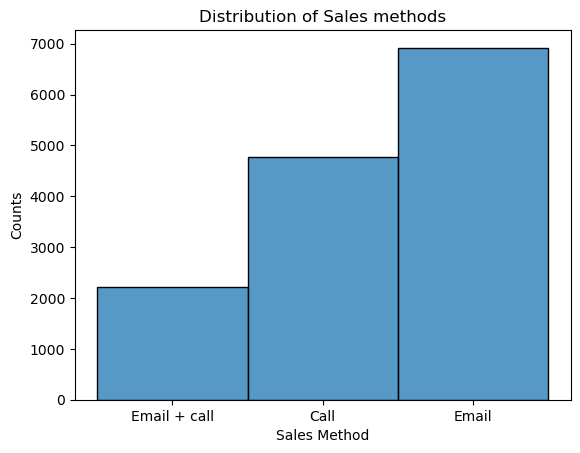

In [58]:
# How many customers were there for each approach?
sns.histplot(df['sales_method'])
plt.xlabel('Sales Method')
plt.ylabel('Counts')
plt.title('Distribution of Sales methods')
plt.show();

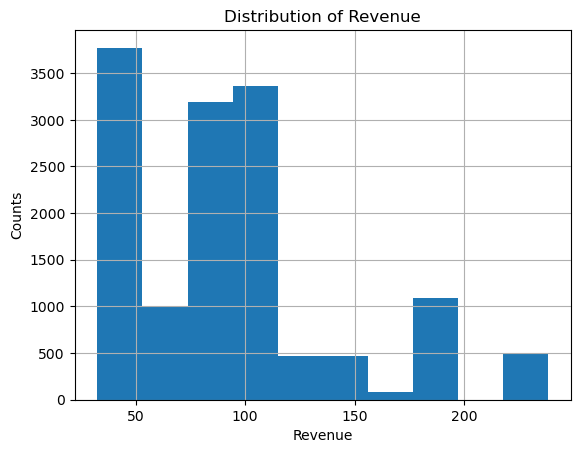

In [59]:
# What does the spread of the revenue look like overall?
df['revenue'].hist()
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Distribution of Revenue')
plt.show();

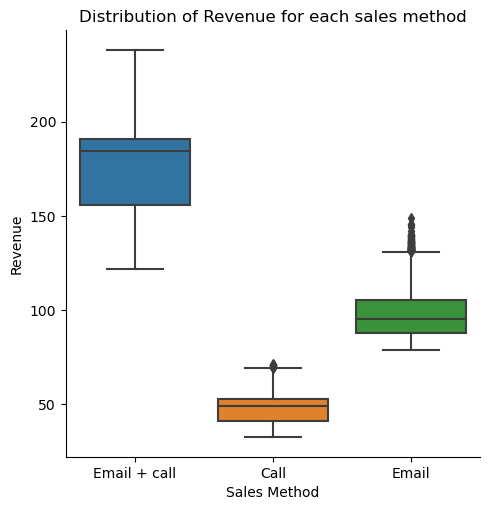

In [68]:
# What does the spread of the revenue look like for each method?
sns.catplot(data=df, y='revenue', x='sales_method', kind='box', ci=None)
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for each sales method')
plt.show();

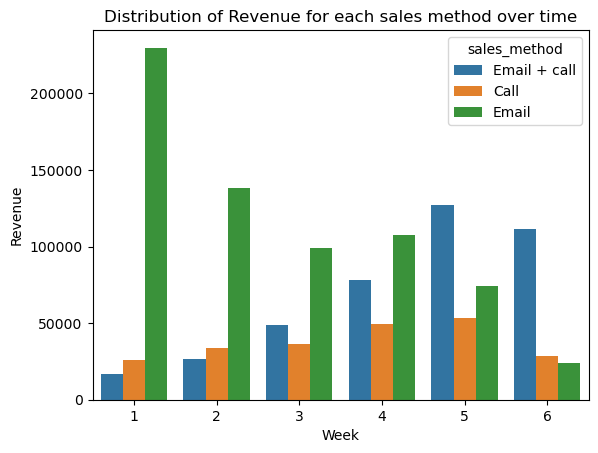

In [96]:
# Was there any difference in revenue over time for each of the methods?
sns.barplot(data=df, y='revenue', x='week', hue='sales_method', estimator=sum, ci=None)
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for each sales method over time')
plt.show();

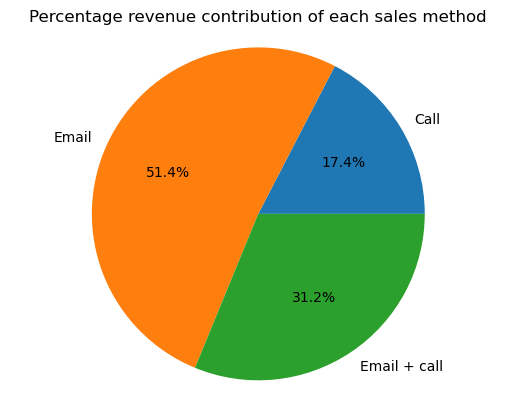

In [119]:
# Pie chart showing the percentage revenue contribution of each sales method
plt.pie(df.groupby('sales_method')['revenue'].sum(), autopct='%1.1f%%', labels=['Call', 'Email', 'Email + call'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Percentage revenue contribution of each sales method')
plt.show();

In [115]:
df.groupby('sales_method')['revenue'].sum()

sales_method
Call            227563.49
Email           672317.83
Email + call    408256.69
Name: revenue, dtype: float64